### Extracting features - Finance analysis

### Features Extracted:

- https://github.com/lappis-unb/salic-ml/wiki/Brainstorming-de-features-para-estimar-Complexidade-Financeira
    
Gerar features de um segmento "ESPECÍFICO" e "GLOBAIS".

### Importing data

In [19]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


from salicml.utils.dates import Dates
from salicml.utils.read_csv import read_csv
from salicml.utils.utils import debug

PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir, os.pardir))
DATA_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'raw')

#### PLANILHA ORCAMENTARIA

QUERY: /data/scripts/planilha_orcamentaria.sql


In [20]:
PlanilhaOrcamentaria = 'planilha_orcamentaria.csv'
dt_items = read_csv(PlanilhaOrcamentaria)

dt_items.head()

,idPronac,PRONAC,idPlanilhaAprovacao,Item,idPlanilhaItens,Unidade,QtDias,QtItem,nrOcorrencia,VlUnitarioSolicitado,...,UfItem,MunicipioItem,Etapa,idArea,Area,idSegmento,Segmento,idProduto,Produto,DataProjeto
0,114166,93004,50109,Montagem e desmontagem,88,Serviço,2,1.0,2,140.00,...,PB,Sumé,2 - Produção / Execução,5,Patrimônio Cultural,51,História,62,Exposição de Artes,2009-06-26 09:46:54
1,123461,103228,239572,Locação de Piano,3040,Serviço,12,1.0,6,1500.00,...,RJ,Rio de Janeiro,2 - Produção / Execução,3,Música,33,Música Instrumental,51,Apresentação Musical,2010-05-06 10:49:13
2,123461,103228,239599,Programa,2634,Unidade,6,400.0,6,2.00,...,RJ,Rio de Janeiro,3 - Divulgação / Comercialização,3,Música,33,Música Instrumental,51,Apresentação Musical,2010-05-06 10:49:13
3,132803,1012471,86608,Transporte Local / Locação de Automóvel / Comb...,134,Metro 3 / Km,4,500.0,4,1.45,...,MG,Viçosa,2 - Produção / Execução,7,Artes Integradas,71,Artes Integradas,51,Apresentação Musical,2010-12-21 17:09:22
4,115111,93932,11387,Confecção de painéis explicativos,90,Unidade,30,20.0,1,300.00,...,PE,Recife,2 - Produção / Execução,7,Artes Integradas,71,Artes Integradas,62,Exposição de Artes,2009-07-27 08:40:04


In [21]:
dt_items.describe()

,idPronac,PRONAC,idPlanilhaAprovacao,idPlanilhaItens,QtDias,QtItem,nrOcorrencia,VlUnitarioSolicitado,VlTotalSolicitado,VlUnitarioAprovado,VlTotalAprovado,idArea,idProduto
count,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06,1.924484e+06,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06,2.001717e+06
mean,1.705448e+05,3.661477e+05,1.088411e+06,1.927301e+03,3.297452e+03,3.133006e+02,2.105666e+01,7.847880e+03,2.116828e+04,7.472390e+03,1.820233e+04,2.825781e+00,3.716994e+01
std,2.482247e+04,4.513037e+05,6.602932e+05,1.663805e+03,1.744404e+06,9.686256e+03,2.439242e+02,6.078395e+04,1.177420e+05,6.070852e+05,1.055173e+05,1.758489e+00,3.788246e+01
min,1.112180e+05,9.010500e+04,1.000000e+00,1.000000e+01,-3.650000e+02,-1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00,-3.000000e+03,1.000000e+00,0.000000e+00
25%,1.499760e+05,1.285460e+05,5.250340e+05,1.420000e+02,1.000000e+01,1.000000e+00,1.000000e+00,4.000000e+02,2.500000e+03,3.000000e+02,2.000000e+03,1.000000e+00,1.200000e+01
50%,1.675760e+05,1.487550e+05,1.039796e+06,2.140000e+03,6.000000e+01,1.000000e+00,1.000000e+00,2.000000e+03,6.000000e+03,1.500000e+03,5.000000e+03,3.000000e+00,1.900000e+01
75%,1.921040e+05,1.706010e+05,1.614404e+06,3.544000e+03,1.800000e+02,4.000000e+00,3.000000e+00,5.000000e+03,1.700000e+04,5.000000e+03,1.500000e+04,4.000000e+00,5.100000e+01
max,2.181350e+05,1.511277e+06,2.415064e+06,8.294000e+03,1.000000e+09,7.000000e+06,9.999000e+03,2.834383e+07,9.000000e+07,7.200000e+08,9.000000e+07,9.000000e+00,1.540000e+02


In [22]:
dt_items = dt_items[['PRONAC', 'idPlanilhaAprovacao','idSegmento']]
dt_items.head()

,PRONAC,idPlanilhaAprovacao,idSegmento
0,93004,50109,51
1,103228,239572,33
2,103228,239599,33
3,1012471,86608,71
4,93932,11387,71


### FEATURES 
    - Numero de Itens do projeto.

In [23]:
segment_projects = dt_items.groupby(['idSegmento', 'PRONAC']).count()
segment_projects.head()

idPlanilhaAprovacao
idSegmento PRONAC                     
11         90105                    61
           97310                    32
           98022                    17
           100855                   96
           102857                   61

### Plotando as distribuiçoes dos segmentos mais comuns

In [24]:
common_segements = segment_projects.groupby(['idSegmento']).count().sort_values(by='idPlanilhaAprovacao', ascending=False)
common_segements.rename(columns={'idPlanilhaAprovacao': 'Número de projetos'}, inplace=True)
display(common_segements.head())

,Número de projetos
idSegmento,
11,9715
31,4534
33,4261
4B,2618
12,2370


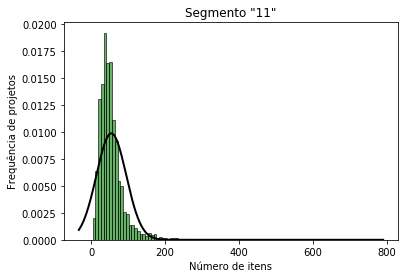

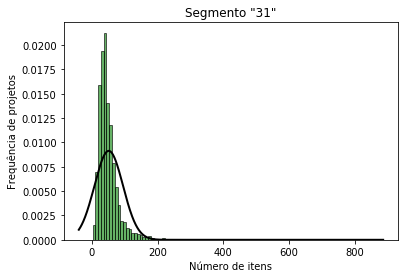

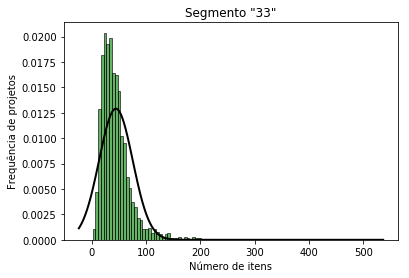

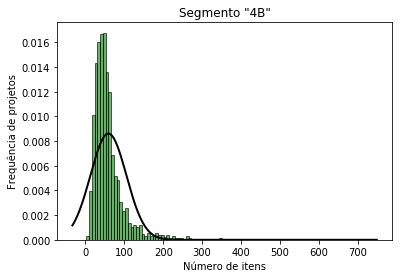

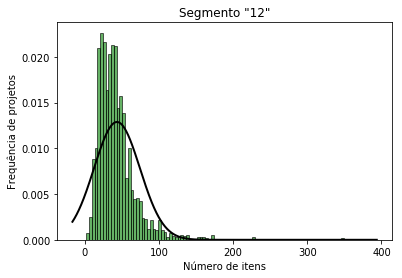

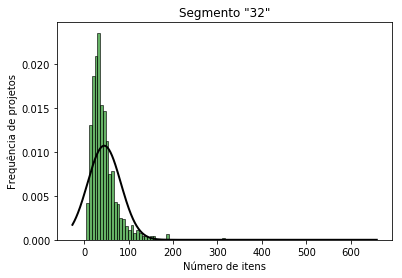

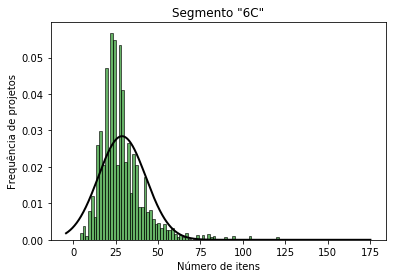

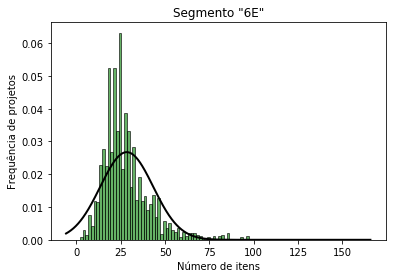

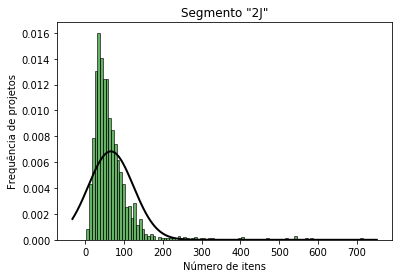

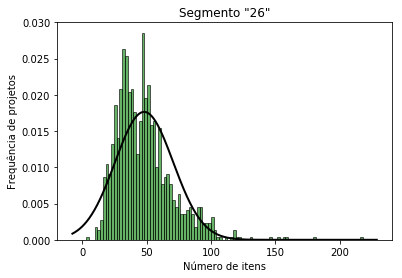

In [25]:
from scipy.stats import norm


def plot_segment(id, items):
    plt.hist(items, bins=100, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.title('Segmento "{}"'.format(id))
    plt.xlabel('Número de itens')
    plt.ylabel('Frequência de projetos')

    mu, std = np.mean(items), np.std(items)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()

for counter, id_segmento in enumerate(common_segements.index.values):    
    projects_num_items = segment_projects.loc[id_segmento].values
    plot_segment(id_segmento, projects_num_items)
    
    counter += 1
    if counter == 10:
        break

In [26]:
segment_items_avg_std = segment_projects.groupby(['idSegmento'])
segment_items_avg_std = segment_items_avg_std.agg(['count', 'sum', 'mean', 'std'])

segment_items_avg_std.columns = segment_items_avg_std.columns.droplevel(0)

segment_items_avg_std.head()

,count,sum,mean,std
idSegmento,,,,
11,9715,530532,54.609573,40.397844
12,2370,102854,43.398312,31.001668
13,411,20539,49.973236,37.866283
14,126,8656,68.698413,49.235966
15,4,204,51.000000,28.011902


### Número de itens por projeto

In [27]:
project_items = dt_items[['PRONAC', 'idPlanilhaAprovacao']].groupby(['PRONAC']).count()
display(project_items.head())

,idPlanilhaAprovacao
PRONAC,
90105,61
90226,34
90335,26
90413,58
90722,33
